# Import data and libraries

Importing libraries

In [96]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importing the dataframe

In [97]:
df=pd.read_csv('/content/DM2425_ABCDEats_DATASET (1).csv',delimiter=',')

# General look at the data

In [98]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [100]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [101]:
df.describe(include=['object'])

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


# Lets check for duplicates

In [102]:
print(df.drop_duplicates())

      customer_id customer_region  customer_age  vendor_count  product_count  \
0      1b8f824d5e            2360          18.0             2              5   
1      5d272b9dcb            8670          17.0             2              2   
2      f6d1b2ba63            4660          38.0             1              2   
3      180c632ed8            4660           NaN             2              3   
4      4eb37a6705            4660          20.0             2              5   
...           ...             ...           ...           ...            ...   
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

       is_chain  first_order  last_orde

In [103]:
df=df.drop_duplicates()
df.duplicated().sum()

0

# Let`s check for missing values

In [104]:
(df.isna().mean()*100).sort_values(ascending=False)

,0
HR_0,3.651765
customer_age,2.280784
first_order,0.332549
customer_id,0.000000
HR_10,0.000000
DOW_6,0.000000
HR_1,0.000000
HR_2,0.000000
HR_3,0.000000
HR_4,0.000000


# Analising original variables

## Let`s analise the customer_id variable

We eill set customer_id as the index of your DataFrame, it is beneficial because it uniquely identifies each customer, making it easier to locate, access, and manage individual customer data efficiently. To do this we need to check if there is repeated ids.

In [105]:
df['customer_id'].describe()

,customer_id
count,31875
unique,31875
top,1b8f824d5e
freq,1


There is no dublicated ids so we will set this variable as the index

In [106]:
df.set_index('customer_id', inplace=True)

## Let`s analise the customer_age variable

In our analysis of the data, we observed that the age variable had 2.28% of its values missing. Since our clustering model cannot accommodate missing values, we will address this issue during the preprocessing stage.

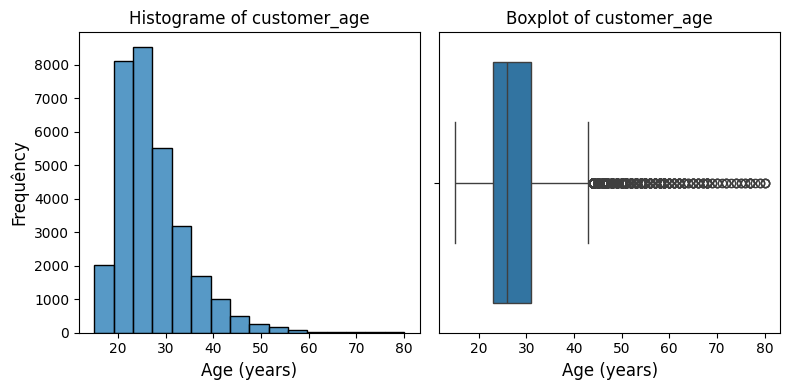

In [107]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['customer_age'], bins=16, kde=False)
plt.title('Histograme of customer_age')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['customer_age'])
plt.title('Boxplot of customer_age')
plt.xlabel('Age (years)', fontsize=12)

plt.tight_layout()
plt.show()

By examining this histogram and boxplot, we can see that the age distribution is asymmetric. This is likely due to outliers, which we can visualize in the boxplot.

We will obtain this outliers reprsented in the boxplot using the inter quartis technique

In [108]:
def detect_outliers_in_column(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [109]:
detect_outliers_in_column(df,'customer_age')['customer_age'].sort_values()

,customer_age
customer_id,
f4afb20885,44.0
f48b178ab2,44.0
6dfdf625fa,44.0
63d635d8df,44.0
ee3ff30383,44.0
...,...
a956a51629,79.0
1c15824d4f,79.0
65ab5e9447,80.0


For better visualtion of our data, we will exclude the outliers for now:

In [110]:
df_age=df.copy()
df_age=df_age[df_age['customer_age']<44]

Same visualisation as before but without the outliers

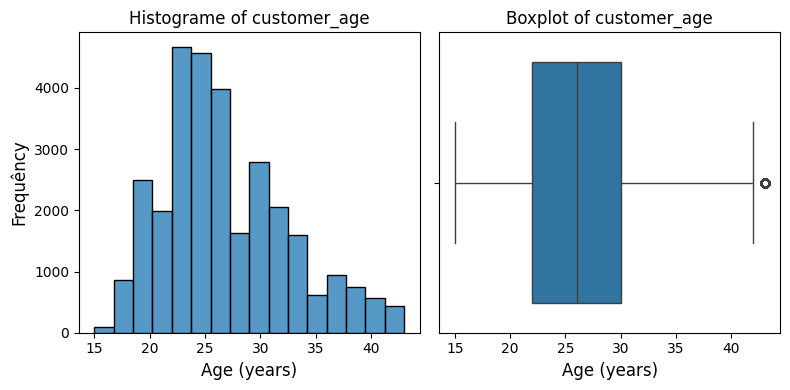

In [111]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_age['customer_age'], bins=16, kde=False)
plt.title('Histograme of customer_age')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=df_age['customer_age'])
plt.title('Boxplot of customer_age')
plt.xlabel('Age (years)', fontsize=12)

plt.tight_layout()
plt.show()

## Let`s analise the customer_region variable

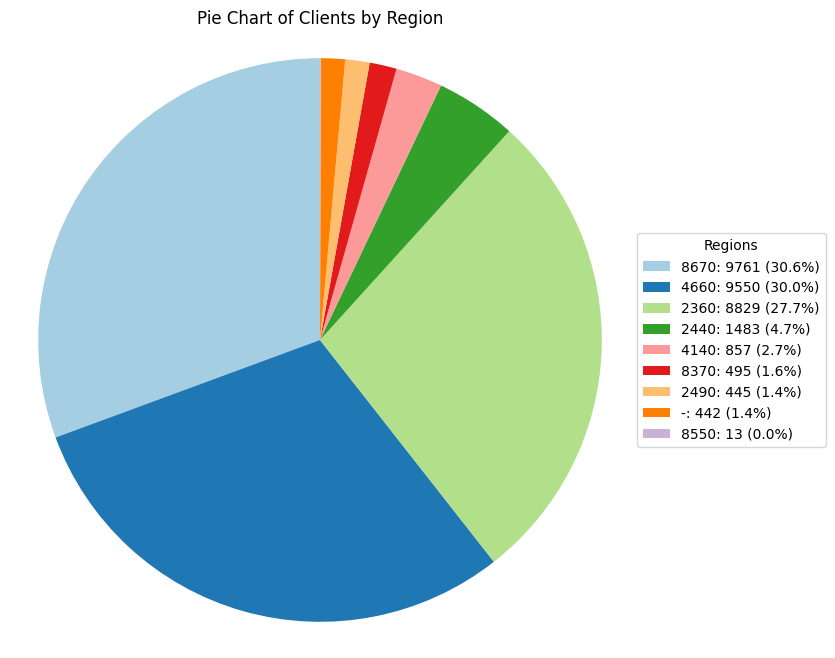

In [112]:
region_counts = df['customer_region'].value_counts(dropna=True)
colors = plt.cm.Paired(range(len(region_counts)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]
plt.legend(wedges, legend_labels, title="Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Pie Chart of Clients by Region")
plt.axis('equal')
plt.show()

## Let`s analise the vendor_count variable

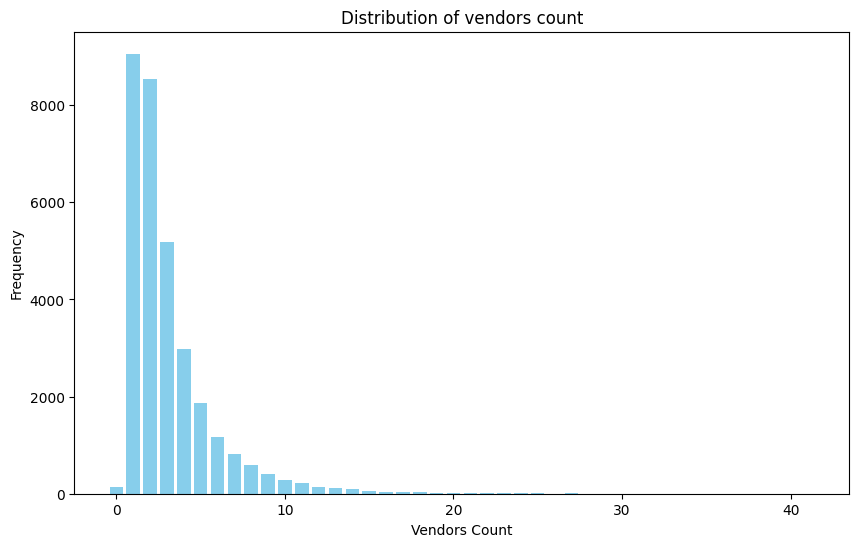

In [132]:
vendor_counts = df['vendor_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(vendor_counts.index, vendor_counts.values, color='skyblue')
plt.xlabel('Vendors Count')
plt.ylabel('Frequency')
plt.title('Distribution of vendors count')
plt.xticks(rotation=0)
plt.show()

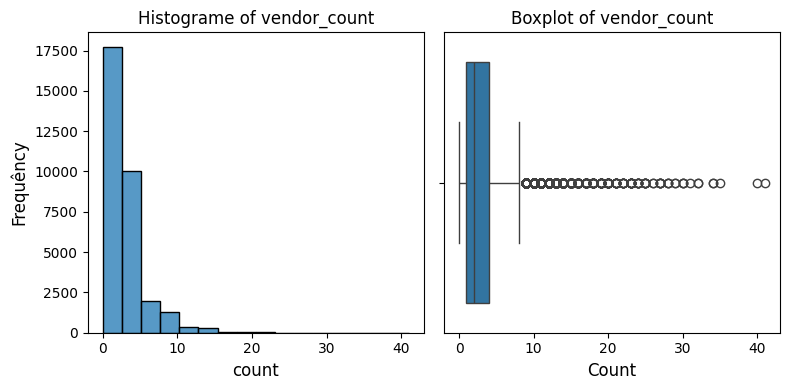

In [114]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['vendor_count'], bins=16, kde=False)
plt.title('Histograme of vendor_count')
plt.xlabel('count', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['vendor_count'])
plt.title('Boxplot of vendor_count')
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Examining the histogram and boxplot reveals an asymmetric age distribution, likely influenced by outliers, as shown in the boxplot. These outliers are unlikely to be data errors; they probably represent clients who simply decided to make more purchases.

We will obtain this outliers reprsented in the boxplot using the inter quartis technique

In [115]:
detect_outliers_in_column(df,'vendor_count')['vendor_count'].sort_values()

,vendor_count
customer_id,
47cd9589d2,9
7cc156c53d,9
e2b48611a0,9
a5e5a6cf7c,9
057dc4e4a7,9
...,...
9870fd931f,34
0ff44f1053,34
4b4f32ffc1,35


To get better visualisations, we will exclude the outliers for now:

In [116]:
df_vendor_count=df.copy()
df_vendor_count=df_vendor_count[df_vendor_count['vendor_count']<9]

In [117]:
df_vendor_count['vendor_count'].describe()

,vendor_count
count,30352.000000
mean,2.650336
std,1.733430
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


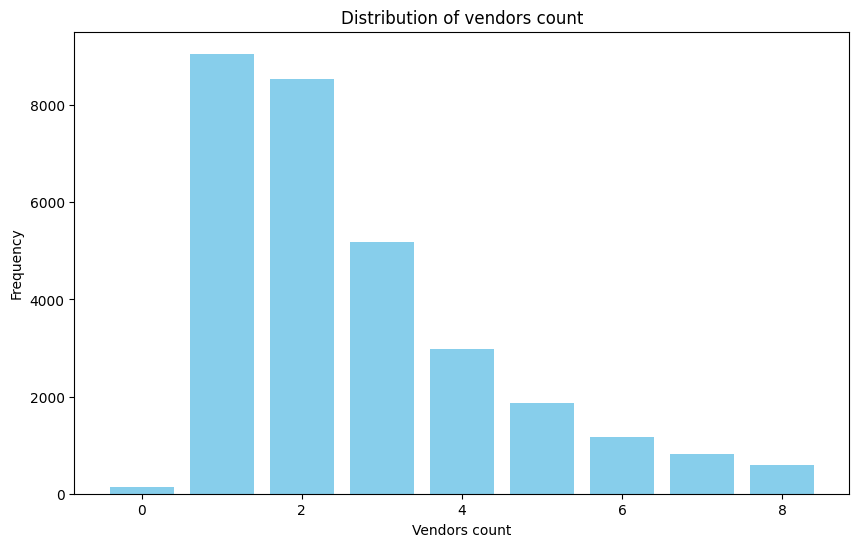

In [130]:
vendor_counts = df_vendor_count['vendor_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(vendor_counts.index, vendor_counts.values, color='skyblue')
plt.xlabel('Vendors count')
plt.ylabel('Frequency')
plt.title('Distribution of vendors count')
plt.xticks(rotation=0)
plt.show()

## Let`s analise the product_count variable

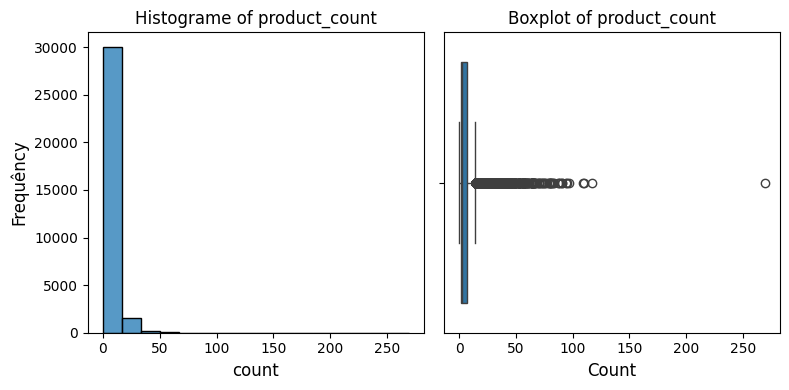

In [119]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['product_count'], bins=16, kde=False)
plt.title('Histograme of product_count')
plt.xlabel('count', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['product_count'])
plt.title('Boxplot of product_count')
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Analyzing the boxplot, we observe an outlier that stands far from the other values, representing an extreme point that could negatively impact our analysis and visualization. To mitigate this, we will adjust it to a more reasonable high value.

In [120]:
df['product_count'].max()

269

In [121]:
print(df[df['product_count']==269].index)

Index(['92ced2dcb9'], dtype='object', name='customer_id')


In [122]:
df.loc['92ced2dcb9','product_count']=100

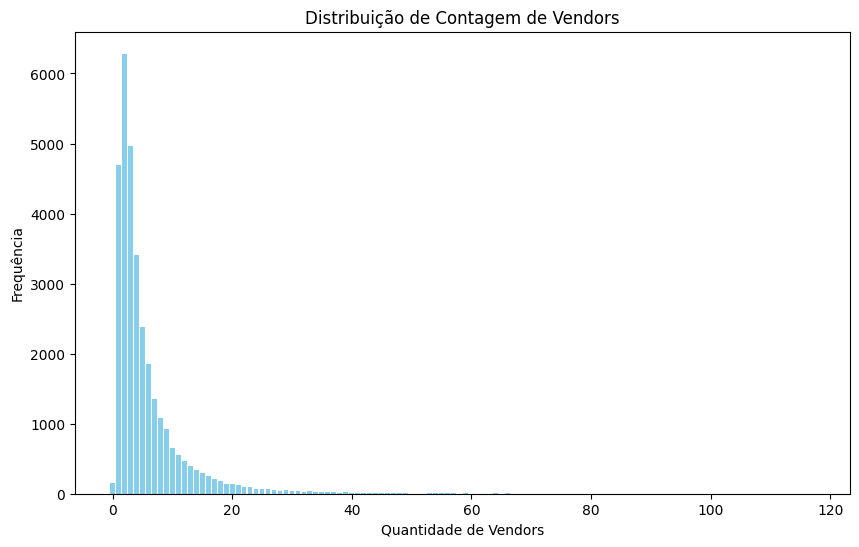

In [123]:
product_counts = df['product_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(product_counts.index, product_counts.values, color='skyblue')
plt.xlabel('Vendors Count')
plt.ylabel('Frequency')
plt.title('Distribution of Vendors Count')
plt.xticks(rotation=0)
plt.show()

In these variable, there is still outliers that make the visualisation harder. These outliers are unlikely to be data errors; they probably represent clients who simply decided to make more purchases.

We will obtain this outliers using the inter quartis technique

In [124]:
detect_outliers_in_column(df,'product_count')['product_count'].sort_values()

,product_count
customer_id,
81edb5d108,15
51c3de7464,15
a64d20b035,15
610bf919e0,15
52828f3ebf,15
...,...
9870fd931f,97
92ced2dcb9,100
d798652ec0,109


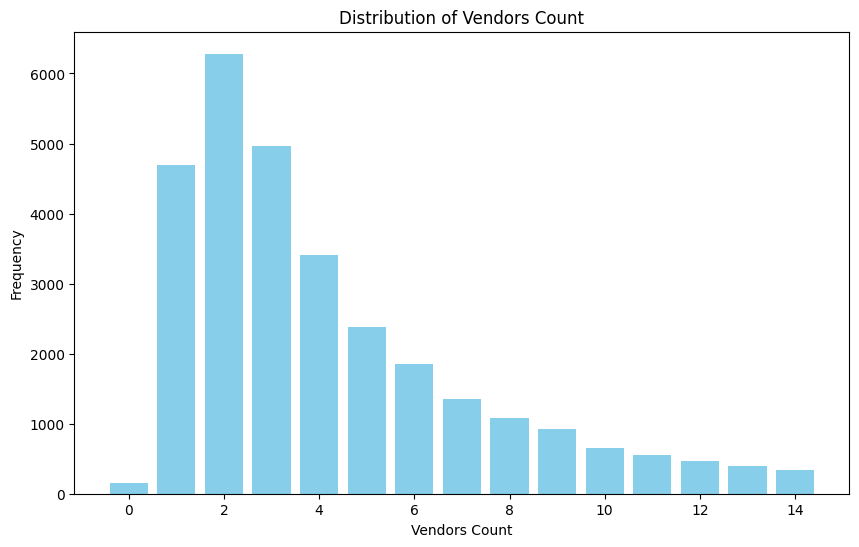

In [131]:
df_product_count=df.copy()
df_product_count=df_product_count[df_product_count['product_count']<15]
product_counts = df_product_count['product_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(product_counts.index, product_counts.values, color='skyblue')
plt.xlabel('Vendors Count')
plt.ylabel('Frequency')
plt.title('Distribution of Vendors Count')
plt.xticks(rotation=0)
plt.show()

## Let`s analise the first_order and last_order variables

In our analysis of the data, we observed that the age variable had 0.33% of its values missing. Since our clustering model cannot accommodate missing values, we will address this issue during the preprocessing stage.

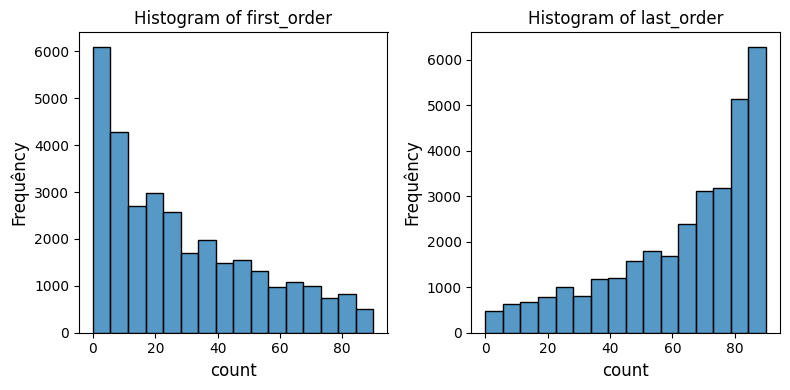

In [133]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['first_order'], bins=16, kde=False)
plt.title('Histogram of first_order')
plt.xlabel('count', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(df['last_order'], bins=16, kde=False)
plt.title('Histogram of last_order')
plt.xlabel('count', fontsize=12)
plt.ylabel('Frequêncy', fontsize=12)

plt.tight_layout()
plt.show()

## Let`s analise the last_promo variable

This categorical variable has 4 values. Wich are:
- "-": Our interpretation, given the limited information about how this data was collected, suggests that this symbol indicates the client did not utilize any promotions.
- "DELIVERY" - the client used the delivery promotion
- "DISCOUNT" - the client used the discount promotion
- "FREEBIE" - the client used the freebie promotion

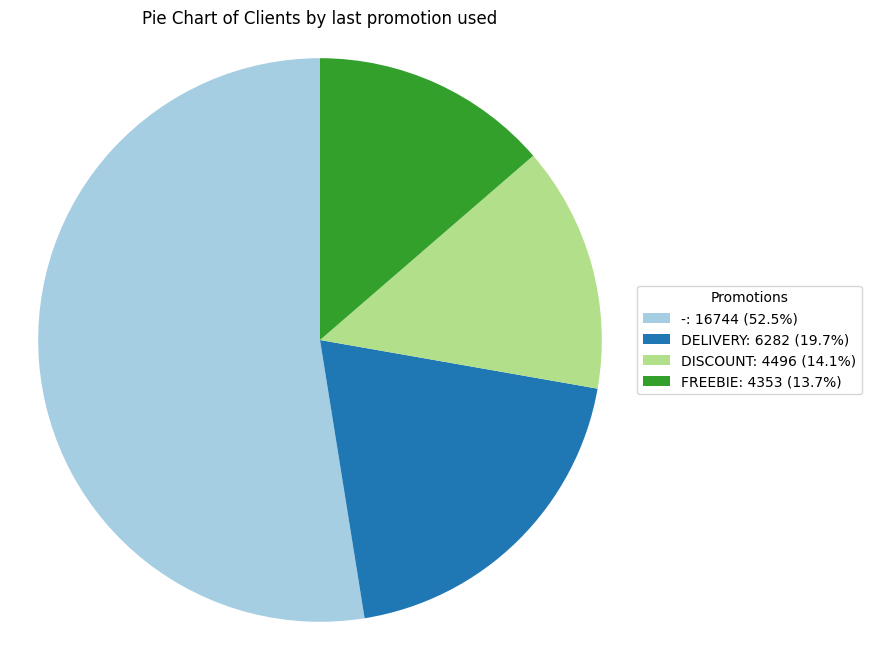

In [136]:
region_counts = df['last_promo'].value_counts(dropna=True)
colors = plt.cm.Paired(range(len(region_counts)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]
plt.legend(wedges, legend_labels, title="Promotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Pie Chart of Clients by last promotion used")
plt.axis('equal')
plt.show()

## Let`s analise the payment_method variable

This categorical variable has 3 values. Wich are:
- "CASH": If the Client used cash as his payment method
- "CARD" - If the Client used card as his payment method
- "DIGI" - If the Client used DIGI as his payment method

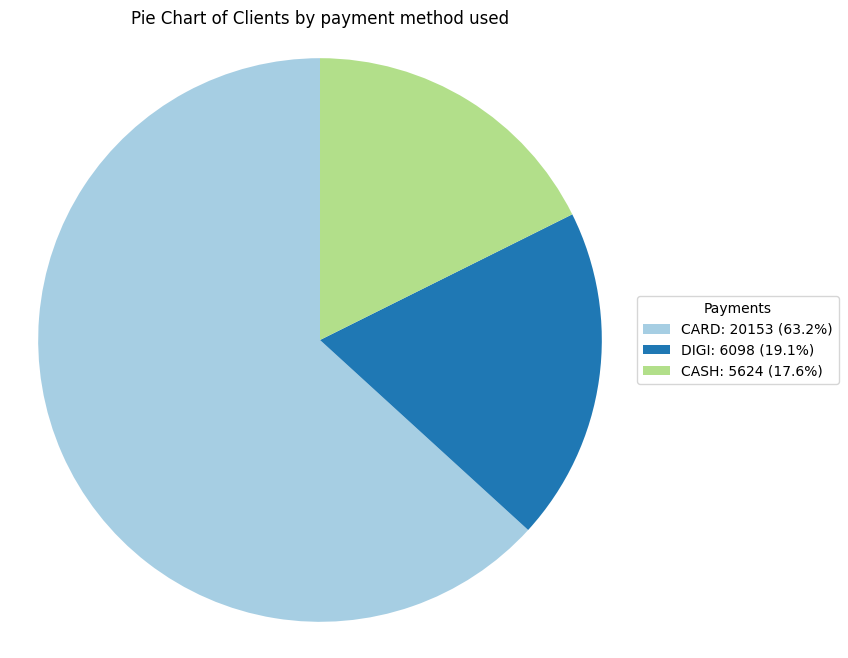

In [137]:
region_counts = df['payment_method'].value_counts(dropna=True)
colors = plt.cm.Paired(range(len(region_counts)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(region_counts, startangle=90, colors=colors)
legend_labels = [f'{region}: {count} ({100 * count / sum(region_counts):.1f}%)' for region, count in zip(region_counts.index, region_counts)]
plt.legend(wedges, legend_labels, title="Payments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Pie Chart of Clients by payment method used")
plt.axis('equal')
plt.show()

## Lets analise the CUIs variables

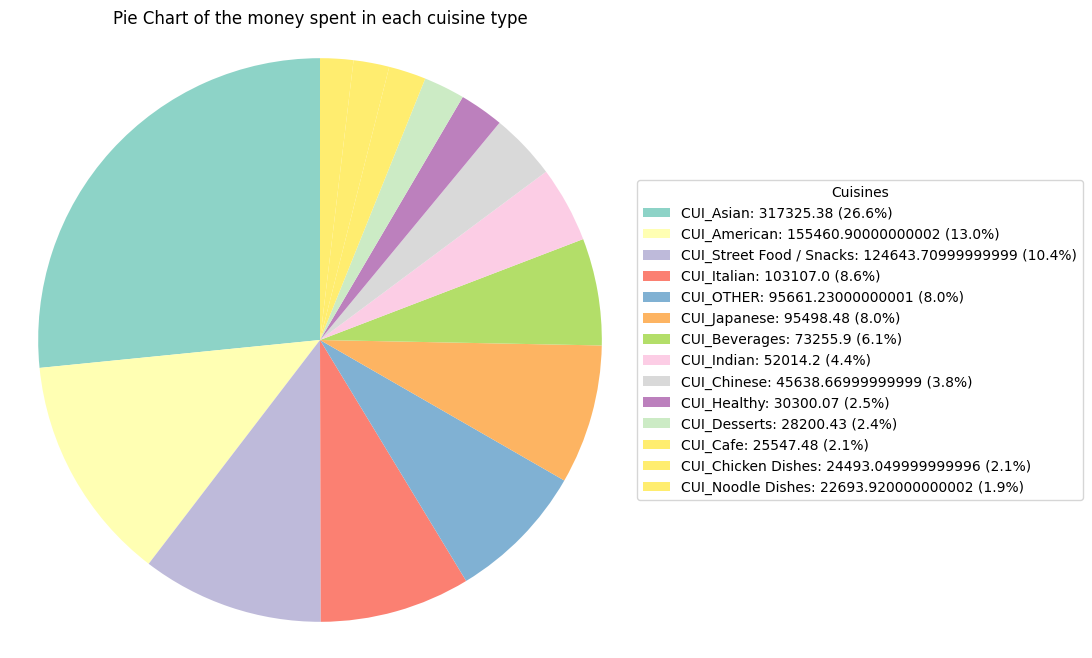

In [140]:
sums_types=df[['CUI_American','CUI_Asian','CUI_Beverages','CUI_Cafe','CUI_Chicken Dishes','CUI_Chinese','CUI_Desserts','CUI_Healthy','CUI_Indian','CUI_Italian','CUI_Japanese','CUI_Noodle Dishes','CUI_OTHER','CUI_Street Food / Snacks']].sum().sort_values(ascending=False)
colors = plt.cm.Set3(range(len(sums_types)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sums_types, startangle=90, colors=colors)
legend_labels = [f'{region}: {count} ({100 * count / sum(sums_types):.1f}%)' for region, count in zip(sums_types.index, sums_types)]
plt.legend(wedges, legend_labels, title="Cuisines", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Pie Chart of the money spent in each cuisine type")
plt.axis('equal')
plt.show()

## Lets analise the DOW`s variables

This variables represents the number of orders placed on each day of the week

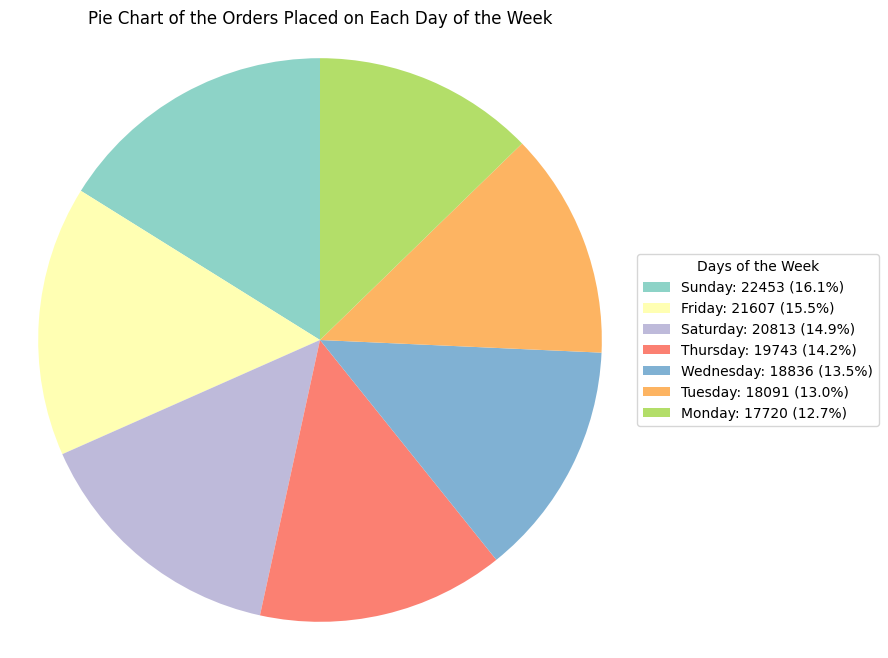

In [143]:
sums_types = df[['DOW_0','DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']].sum().sort_values(ascending=False)
colors = plt.cm.Set3(range(len(sums_types)))
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sums_types, startangle=90, colors=colors)
dias_da_semana = ['Sunday', 'Friday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
legend_labels = [f'{day}: {count} ({100 * count / sum(sums_types):.1f}%)' for day, count in zip(dias_da_semana, sums_types)]
plt.legend(wedges, legend_labels, title="Days of the Week", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Pie Chart of the Orders Placed on Each Day of the Week")
plt.axis('equal')
plt.show()

## Lets analise the HR`s variables

This variables represents the number of orders placed on each hour of a day

In [144]:
df['HR_0'].value_counts()

,count
HR_0,
0.0,30711


The variable 'HR_0' contains a value of 0.0 in all rows, indicating either that there were no orders placed at midnight or that there was an error in collecting data for this variable. Additionally, there are 3.65% of missing values. Due to these two issues, we will exclude this variable from our analysis, as it lacks significance.

In [1]:
sums_types=df[['HR_0','HR_1','HR_2','HR_3','HR_4','HR_5','HR_6','HR_7','HR_8','HR_8','HR_9','HR_10','HR_11','HR_12','HR_13','HR_14','HR_15','HR_16','HR_17','HR_18','HR_19','HR_20','HR_21','HR_22','HR_23']].sum().sort_values(ascending=False)
np.random.seed(123)
colors = np.random.rand(24, 3)
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(sums_types, startangle=90, colors=colors)
legend_labels = [f'{region}: {count} ({100 * count / sum(sums_types):.1f}%)' for region, count in zip(sums_types.index, sums_types)]
plt.legend(wedges, legend_labels, title="Payments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Número de clientes por tipo de cozinha")
plt.axis('equal')
plt.show()

NameError: name 'df' is not defined